In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C://Users//kamal//Downloads//bank_data.csv")

In [3]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.shape

(1882, 6)

In [5]:
df.size

11292

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [7]:
df.apply(lambda x: x.nunique())


id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64

In [8]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Display basic statistics of the numeric columns
print(df.describe())

                id  expected_recovery_amount  actual_recovery_amount  \
count  1882.000000               1882.000000             1882.000000   
mean   1035.596174               2759.967588             4000.967837   
std     591.458429               2019.826565             4576.506350   
min       6.000000                194.000000              200.425000   
25%     534.250000               1261.250000             1045.190300   
50%    1029.500000               2062.000000             2115.446373   
75%    1551.750000               3569.500000             5417.237207   
max    2056.000000               9964.000000            34398.479710   

               age  
count  1882.000000  
mean     39.650372  
std      15.453072  
min      18.000000  
25%      28.000000  
50%      35.000000  
75%      50.000000  
max      84.000000  


In [11]:
# Display correlation matrix for numeric columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                id  expected_recovery_amount  \
id                        1.000000                 -0.110098   
expected_recovery_amount -0.110098                  1.000000   
actual_recovery_amount   -0.071510                  0.903727   
age                      -0.073001                  0.794451   

                          actual_recovery_amount       age  
id                                     -0.071510 -0.073001  
expected_recovery_amount                0.903727  0.794451  
actual_recovery_amount                  1.000000  0.716007  
age                                     0.716007  1.000000  


# Exploratory Data Analysis

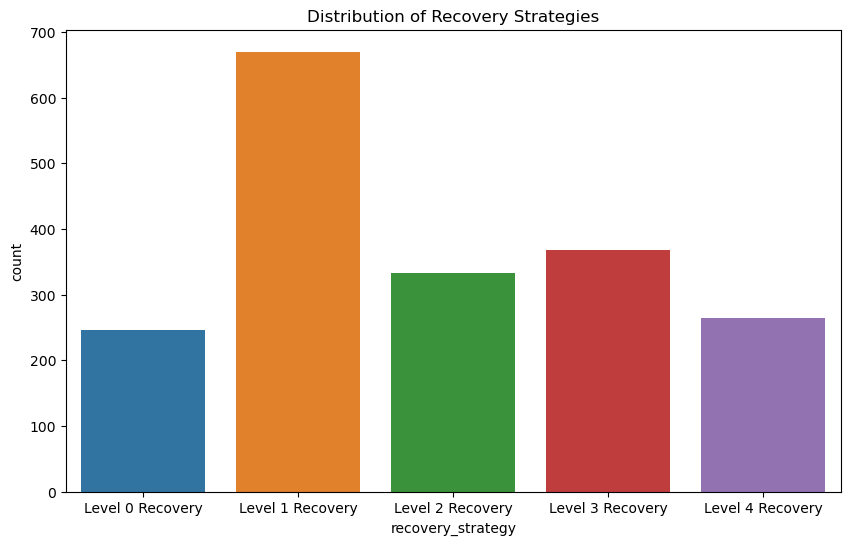

In [12]:
# Visualize categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='recovery_strategy', data=df)
plt.title('Distribution of Recovery Strategies')
plt.show()

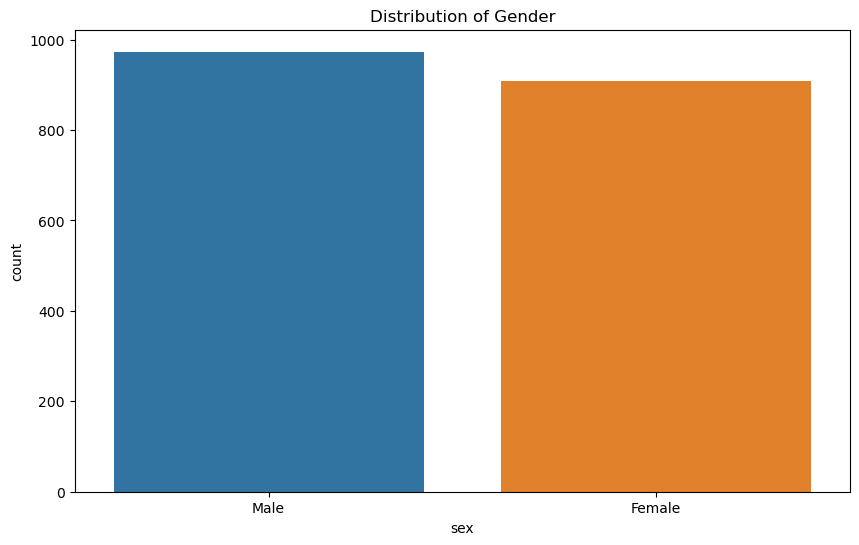

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.show()

# Bivariate analysis

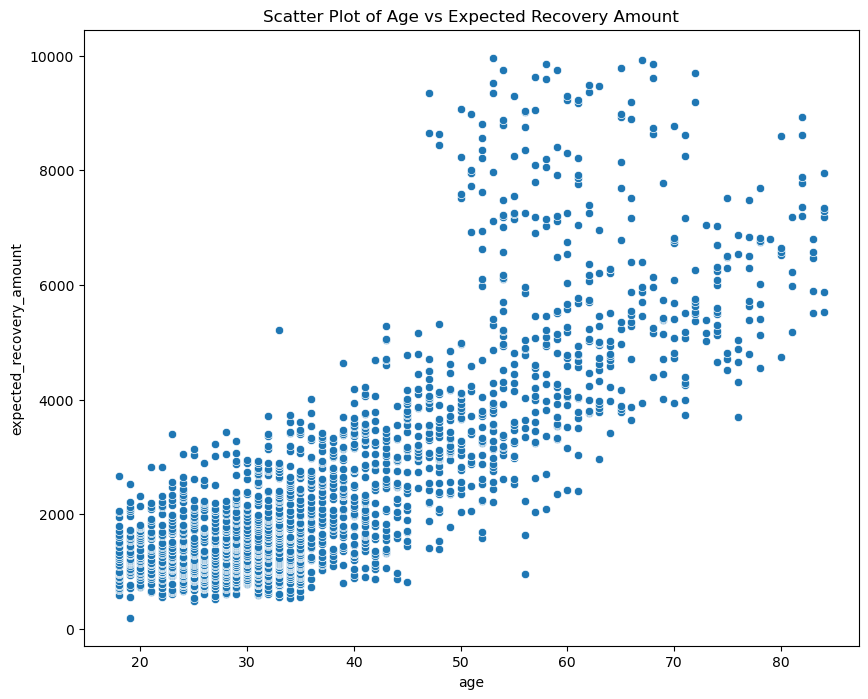

In [14]:
# Scatter plot for two numeric variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='expected_recovery_amount', data=df)
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
plt.show()

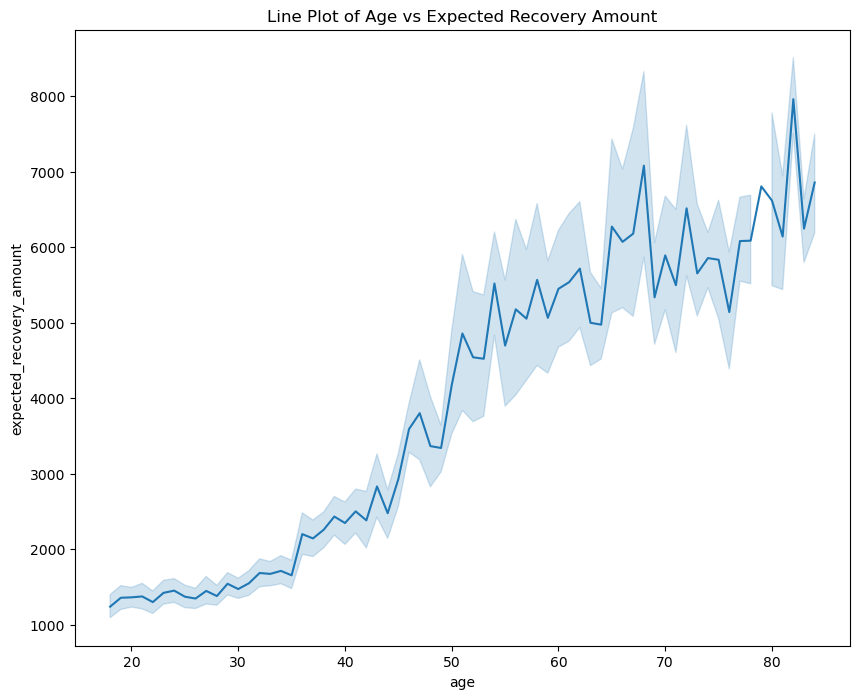

In [15]:
# Line plot for two numeric variables
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='expected_recovery_amount', data=df)
plt.title('Line Plot of Age vs Expected Recovery Amount')
plt.show()

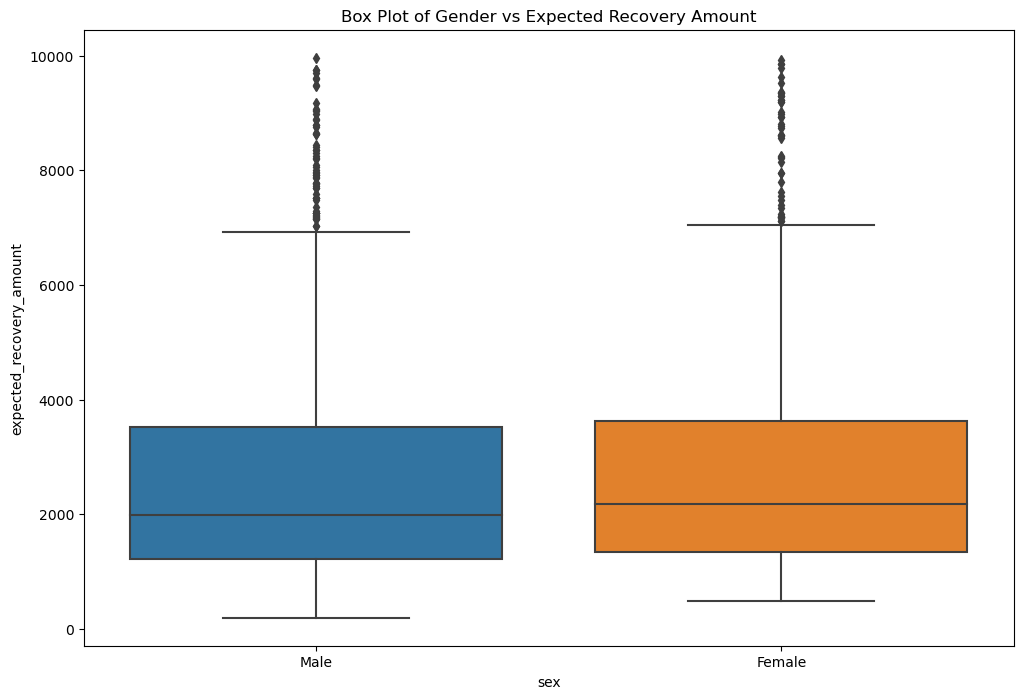

In [16]:
# Box plot for a categorical and a numeric variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='expected_recovery_amount', data=df)
plt.title('Box Plot of Gender vs Expected Recovery Amount')
plt.show()

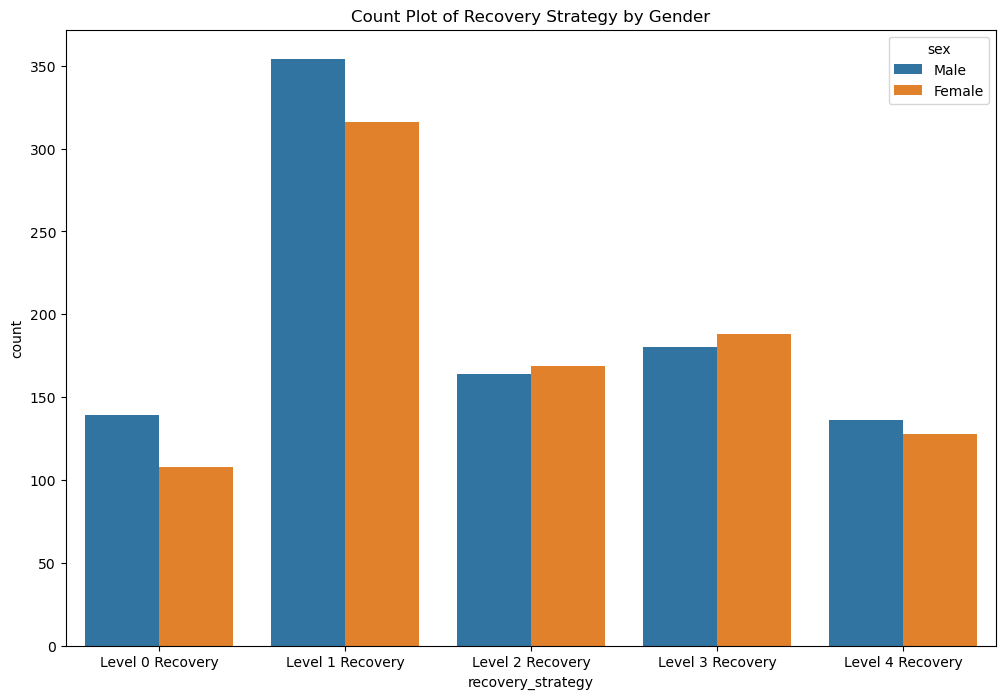

In [17]:
# Bar plot for two categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='recovery_strategy', hue='sex', data=df)
plt.title('Count Plot of Recovery Strategy by Gender')
plt.show()

# Multivariate Analysis

C:\Users\kamal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


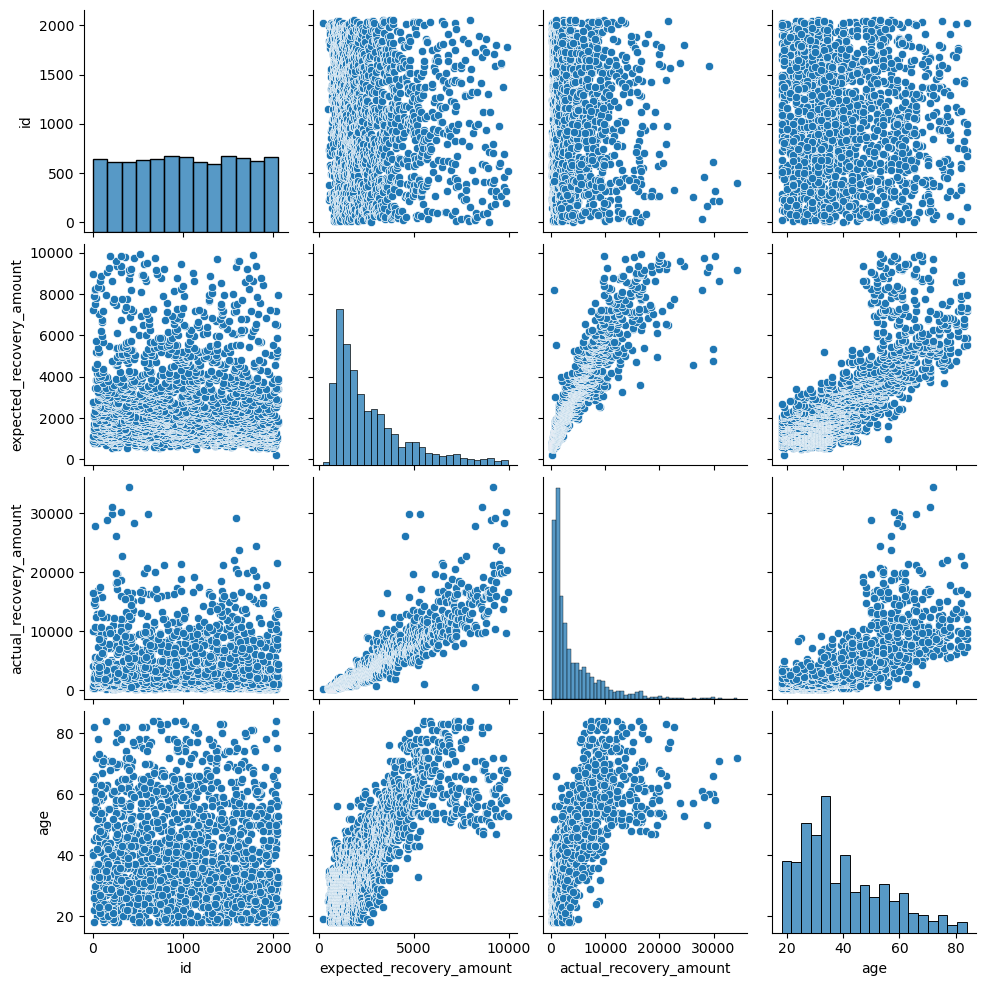

In [18]:
# Visualize distribution of numeric columns
sns.pairplot(df)
plt.show()

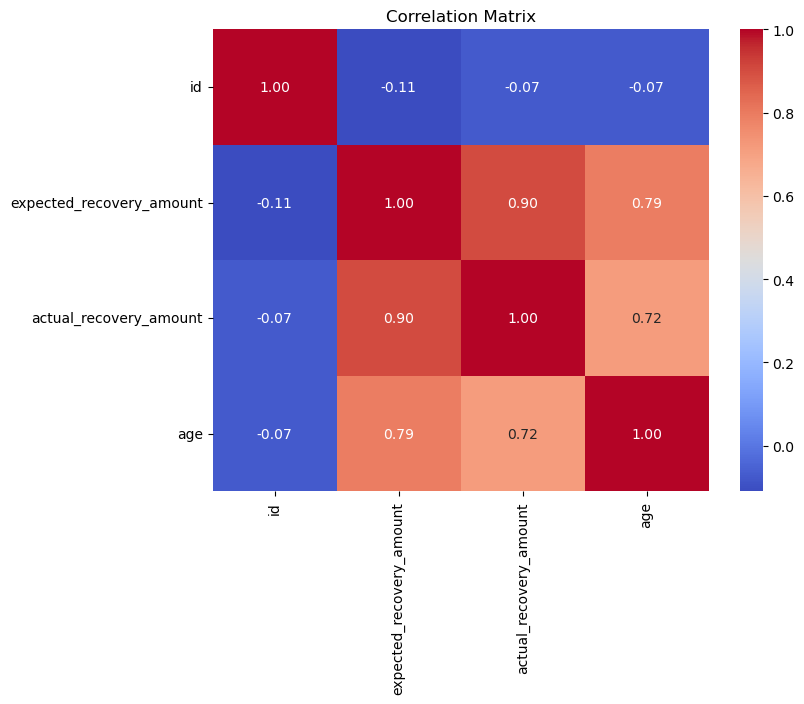

In [19]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Statistical test: age vs. expected recovery amount

In [20]:
import pandas as pd
from scipy.stats import ttest_ind


# Select data around the $1000 Expected Recovery Amount threshold
threshold_lower = 900
threshold_upper = 1100

above_threshold = df[df['expected_recovery_amount'] > threshold_upper]['age']
below_threshold = df[df['expected_recovery_amount'] < threshold_lower]['age']

# Perform t-test
t_statistic, p_value = ttest_ind(above_threshold, below_threshold, equal_var=False)

# Display results
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

# Check if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print('The difference in average age is statistically significant.')
else:
    print('There is no statistically significant difference in average age.')


T-Statistic: 23.7365
P-Value: 0.0000
The difference in average age is statistically significant.


# Exploratory graphical analysis: recovery amount

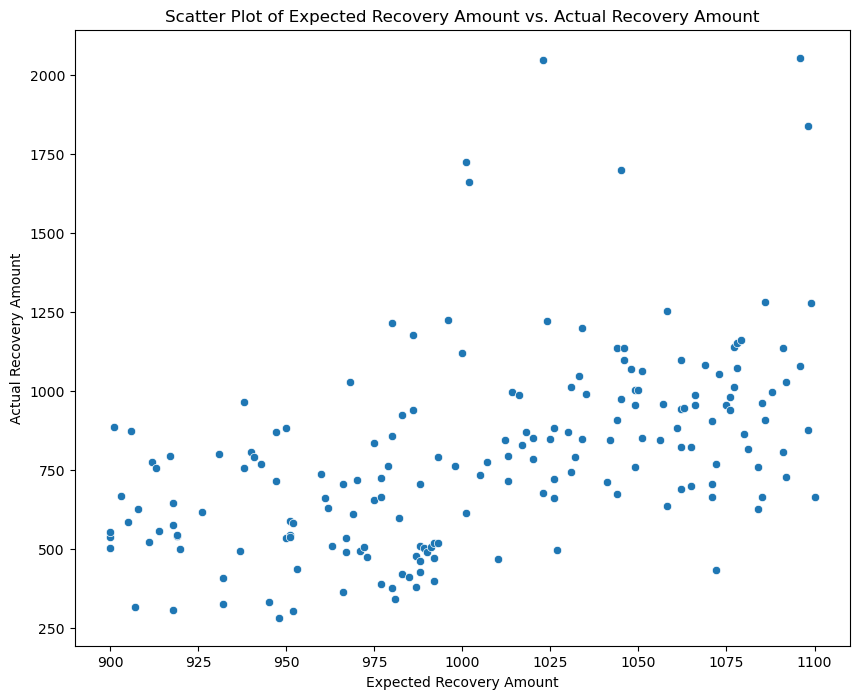

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the actual dataset

# Select data around the $1000 Expected Recovery Amount threshold
threshold_lower = 900
threshold_upper = 1100

selected_data = df[(df['expected_recovery_amount'] >= threshold_lower) & (df['expected_recovery_amount'] <= threshold_upper)]

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=selected_data)
plt.title('Scatter Plot of Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.show()


# Statistical analysis: recovery amount

In [22]:
from scipy.stats import kruskal

# Define the two different windows
window_1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
window_2 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Perform Kruskal-Wallis test for each window
statistic_1, p_value_1 = kruskal(*[group['actual_recovery_amount'] for name, group in window_1.groupby('expected_recovery_amount')])
statistic_2, p_value_2 = kruskal(*[group['actual_recovery_amount'] for name, group in window_2.groupby('expected_recovery_amount')])

# Display results for window 1
print(f'Kruskal-Wallis Statistic (Window 1): {statistic_1:.4f}')
print(f'P-Value (Window 1): {p_value_1:.4f}')

# Check if the difference is statistically significant for window 1
alpha = 0.05
if p_value_1 < alpha:
    print('There is a statistically significant difference in actual recovery amount (Window 1).')
else:
    print('There is no statistically significant difference in actual recovery amount (Window 1).')

# Display results for window 2
print(f'Kruskal-Wallis Statistic (Window 2): {statistic_2:.4f}')
print(f'P-Value (Window 2): {p_value_2:.4f}')

# Check if the difference is statistically significant for window 2
if p_value_2 < alpha:
    print('There is a statistically significant difference in actual recovery amount (Window 2).')
else:
    print('There is no statistically significant difference in actual recovery amount (Window 2).')


Kruskal-Wallis Statistic (Window 1): 148.1929
P-Value (Window 1): 0.0471
There is a statistically significant difference in actual recovery amount (Window 1).
Kruskal-Wallis Statistic (Window 2): 76.3359
P-Value (Window 2): 0.1588
There is no statistically significant difference in actual recovery amount (Window 2).


# Regression modeling: no threshold

In [23]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your DataFrame with the actual dataset

# Select data just above and just below the $1000 Expected Recovery Amount threshold
threshold_lower = 900
threshold_upper = 1100

selected_data = df[(df['expected_recovery_amount'] >= threshold_lower) & (df['expected_recovery_amount'] <= threshold_upper)]

# Model without a threshold
model_without_threshold = sm.OLS(selected_data['actual_recovery_amount'], sm.add_constant(selected_data['expected_recovery_amount'])).fit()

# Display regression summary
print("Regression Model Without Threshold:")
print(model_without_threshold.summary())


Regression Model Without Threshold:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           3.65e-13
Time:                            16:13:38   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

It suggests a positive impact of the program on the actual recovery amount.

# Regression modeling: adding true threshold

In [24]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your DataFrame with the actual dataset

# Select data just above and just below the $1000 Expected Recovery Amount threshold
threshold_lower = 900
threshold_upper = 1100

selected_data = df[(df['expected_recovery_amount'] >= threshold_lower) & (df['expected_recovery_amount'] <= threshold_upper)]

# Create a dummy variable for above and below the threshold
selected_data['above_threshold'] = (selected_data['expected_recovery_amount'] > 1000).astype(int)

# Model with an indicator for the true threshold
model_with_threshold = sm.OLS(selected_data['actual_recovery_amount'],
                              sm.add_constant(selected_data[['expected_recovery_amount', 'above_threshold']])).fit()

# Display regression summary
print("Regression Model With Threshold:")
print(model_with_threshold.summary())


Regression Model With Threshold:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           1.22e-14
Time:                            16:13:38   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

C:\Users\kamal\AppData\Local\Temp\ipykernel_7012\3924460833.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['above_threshold'] = (selected_data['expected_recovery_amount'] > 1000).astype(int)


# Regression modeling: adjusting the window

In [25]:
import statsmodels.api as sm
import pandas as pd

# Select data within the new window of $950 to $1050 for expected recovery amount
new_window_lower = 950
new_window_upper = 1050

selected_data_new_window = df[(df['expected_recovery_amount'] >= new_window_lower) & (df['expected_recovery_amount'] <= new_window_upper)]

# Create a dummy variable for above and below the threshold
selected_data_new_window['above_threshold'] = (selected_data_new_window['expected_recovery_amount'] > 1000).astype(int)

# Model with an indicator for the true threshold for the new window
model_with_threshold_new_window = sm.OLS(selected_data_new_window['actual_recovery_amount'],
                                         sm.add_constant(selected_data_new_window[['expected_recovery_amount', 'above_threshold']])).fit()

# Display regression summary for the new window
print("Regression Model With Threshold (New Window):")
print(model_with_threshold_new_window.summary())


Regression Model With Threshold (New Window):
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            16:13:38   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

C:\Users\kamal\AppData\Local\Temp\ipykernel_7012\3348183434.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_new_window['above_threshold'] = (selected_data_new_window['expected_recovery_amount'] > 1000).astype(int)
